# PORTUGUESE BANK MARKETING PROJECT
By : Shashidhar. B


### Introduction
The Data Set Portuguese Bank Marketing is a result of a direct marketing campaign performed by a Portuguese banking institution to sell term deposits. The banking institution made phone calls to potential buyers from May 2008 to November 2010. Often, more
than 1 contact to the same client was required to assess whether a client would place an order.


### Data Source
The original dataset is available at UCI Machine Learning Repository and can be downloaded from this address: https://archive.ics.uci.edu/ml/datasets/bank+marketing

The dataset used here is from Paulo Cortez(Univ. Minho), Serio Moro (ISCTE-IUL) @ 2012

## Objective
To build a model that will help the marketing team to identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

## Steps carried to achieve Objective and Deliverables

1.Import Necessary Libraries and Packages.

2.Import Data.

3.Summarise Data.

4.Data Cleaning and Transformation

5.Train Data Set.

6.Building DecisionTree Model.

7.Regularising DicisionTree.

8.Ensemble Learning Bagging.

9.Ensemble Learning Boosting.

10.RandomForest Classifier.

### 1.Import Necessary Libraries and Packages

In [56]:
#For Numerial Operations numpy(Numerical Python) can be used
import numpy as np

#For Data Analysis pandas(Python Data Analysis Library) can be used
import pandas as pd

#For 2D graphs ploting matplotlib library can be used
import matplotlib.pyplot as plt
#To enable matplotlib to plot in Jupyter Notebook
%matplotlib inline

#For better visualisation of Statistical Data seaborn library can be used
import seaborn as sns

In [57]:
#To Split the Data into Train and Test
from sklearn.model_selection import train_test_split

#To model the DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

#To model the Bagging Classifier
from sklearn.ensemble import BaggingClassifier

#To model the AdaBooster Classifier
from sklearn.ensemble import AdaBoostClassifier

#To model the GradientBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier

#To model the RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

### 2.Import Data

In [58]:
#Reading the Data
file=pd.read_csv("bank-full.csv")

In [59]:
#Deep Copying file for safety
data=file.copy(deep=True)

#Copy of data to overview in Excel
#data.to_csv("PORTUGUESE BANK MARKETING PROJECT.csv")

### 3.Summarise Data

In [60]:
#To Look-up Data
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [61]:
#Getting complete Statistical overview of numerical and categorical data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


In [62]:
#To check for null entries and  data type of the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


There are 45,211 observations and 17 Variables in the Data Set. 

There are 7 continuous measure variables and 10 categorical variables. 

There are no missing values. But however, there are values which are not specified properly in the categorical variables.

we can note that there are no Nan or null values in the contineous variables.

#### Univariate observations

The detailes of the attributes are as follows;

1 - age (numeric)

2 - job : type of job (CATEGORICAL: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (CATEGORICAL:'divorced','married','single',note; divorced meaning divorced or widowed)

4 - education (CATEGORICAL:'primary','secondary','tertiary','unknown')

5 - default: has credit in default? (CATEGORICAL: 'no','yes')

6 - balance: average early balance in euros(numeric)

7 - housing: has housing loan? (CATEGORICAL: 'no','yes')

8 - loan: has personal loan? (CATEGORICAL: 'no','yes')

#related with campaign

9 - contact: contact communication type (CATEGORICAL: 'cellular','telephone','unknown')

10 - day: last contact day of the month (numeric: 1 to 31).This actually should be CATEGORICAL.

11 - month: last contact month of year (CATEGORICAL: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - duration: last contact duration, in seconds (numeric).{this attribute highly affects the output target (e.g., if duration=0 then y='no')}

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric;-1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (CATEGORICAL: 'failure','other','success','unknown')

#output variable (desired target)

17 - Target: has the client subscribed a term deposit? (CATEGORICAL: 'yes','no')

#### STATISTICAL SUMMARY OF UNIVARIATES

1.age: the mean age in the dataset is 41 with a std.dev of 11.

2.job: blue-collor category top the count with 9732 numbers.

3.marital: married tops with frequency 27214.

4.education: majority are having secondary education counting 23202 counts.

5.default: there are 44396 non defaulters totally.

6.balance: 1362 is the mean balance of the account holders in euros of the records.

7.housing: majority(25130) have housing loan, which is unlikely to suscribe.

8.loan: majority(37967) do not have any personal loan, which is likely to suscribe.

9.contact: most of the people have cellular connection (29285), which gives inference that the marketing team can directly contact the client.

10.day: it seems the clients have been contacted nearly twice a month, which is the sweet spot.This actually should be CATEGORICAL.

11.month: may seems to be the month where most of the people are contacted about the campaign.

12.duration: 258seconds in the mean value of conversaion. If duration=0 then it means that the client has not been contacted leading to 'no' in the output.

13.campaign: the clients have been approched twice approximately. The outcome stance gives good inputs for the prediction.

14.pdays: 40 is the mean, which means that the marketing team is out of schedual and a prediction model inputs are much needed to target and resume the campaign(-1 means client was not previously contacted)

15.previous: This will bediscussed bellow.

16.poutcome: This will be discussed below.

In [63]:
data["day"].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

20th seems to be the day where the clients are revisited or an attempted to market the campaign.

In [64]:
data["previous"].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

Most of them are not contacted(36954).

The higher number above 10 may be because they had some issues with other things not related to campaign.

The person with 275 times contacted seems(definitely should be) to be an internal customer or may be an error during data entry.

The people inbetween 20 to 32 are more likely to be the internal customers.

In [65]:
data["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

16.poutcome: unknown(36959) and pending(1840 may be) are high.

### 4.Data Cleaning and Transformation



From above, we can see that there are no actual missing values.

There are indefinite categories in columns with categorical datatype.

Hence,we can conclude that the data is clean from zero, null and Nan values.

#### Bivariate observations

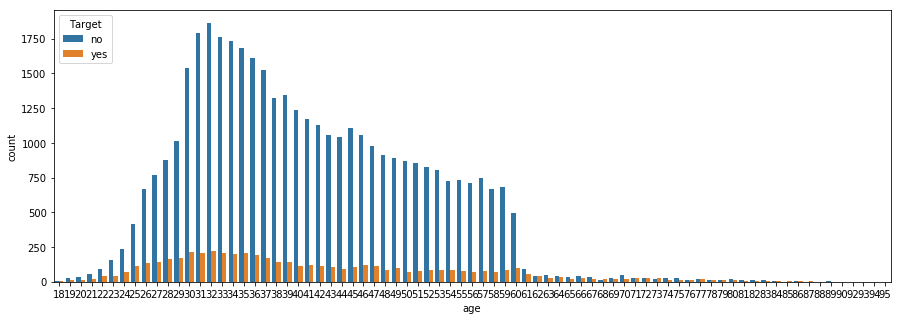

In [66]:
f,axes=plt.subplots(figsize=(15,5))
sns.countplot(x="age", hue="Target", data=data)
plt.show()

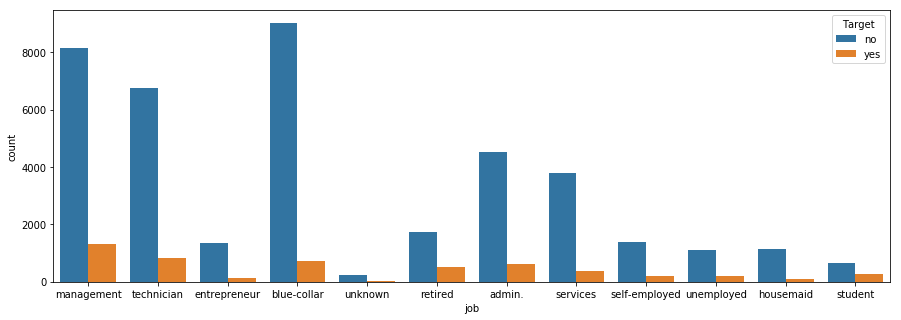

In [67]:
f,axes=plt.subplots(figsize=(15,5))
sns.countplot(x="job", hue="Target", data=data)
plt.show()

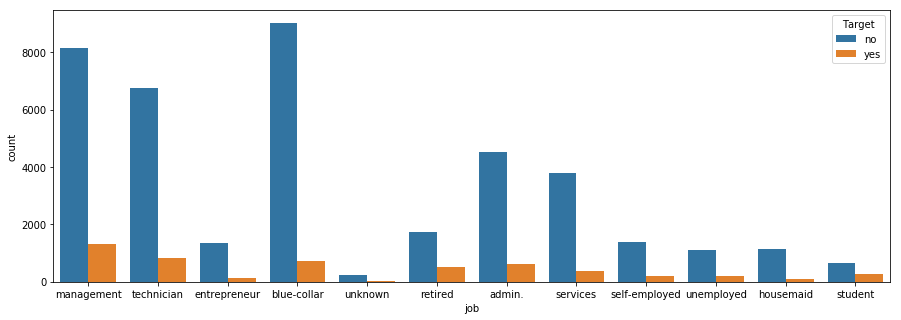

In [68]:
f,axes=plt.subplots(figsize=(15,5))
sns.countplot(x="job", hue="Target", data=data)
plt.show()

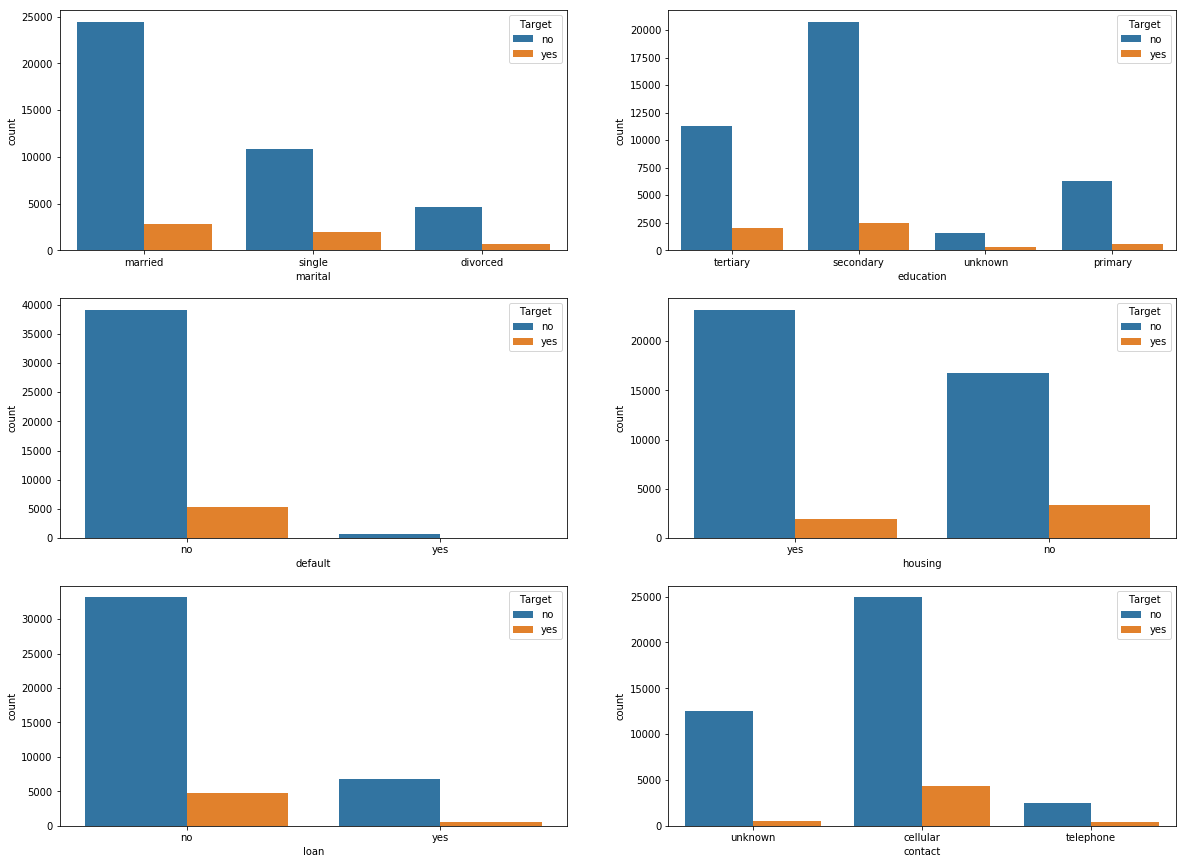

In [69]:
f,axes=plt.subplots(3,2,figsize=(20,15))
sns.countplot(x="marital", hue="Target", data=data,ax=axes[0,0])
sns.countplot(x="education", hue="Target", data=data,ax=axes[0,1])
sns.countplot(x="default", hue="Target", data=data,ax=axes[1,0])
sns.countplot(x="housing", hue="Target", data=data,ax=axes[1,1])
sns.countplot(x="loan", hue="Target", data=data,ax=axes[2,0])
sns.countplot(x="contact", hue="Target", data=data,ax=axes[2,1])
plt.show()

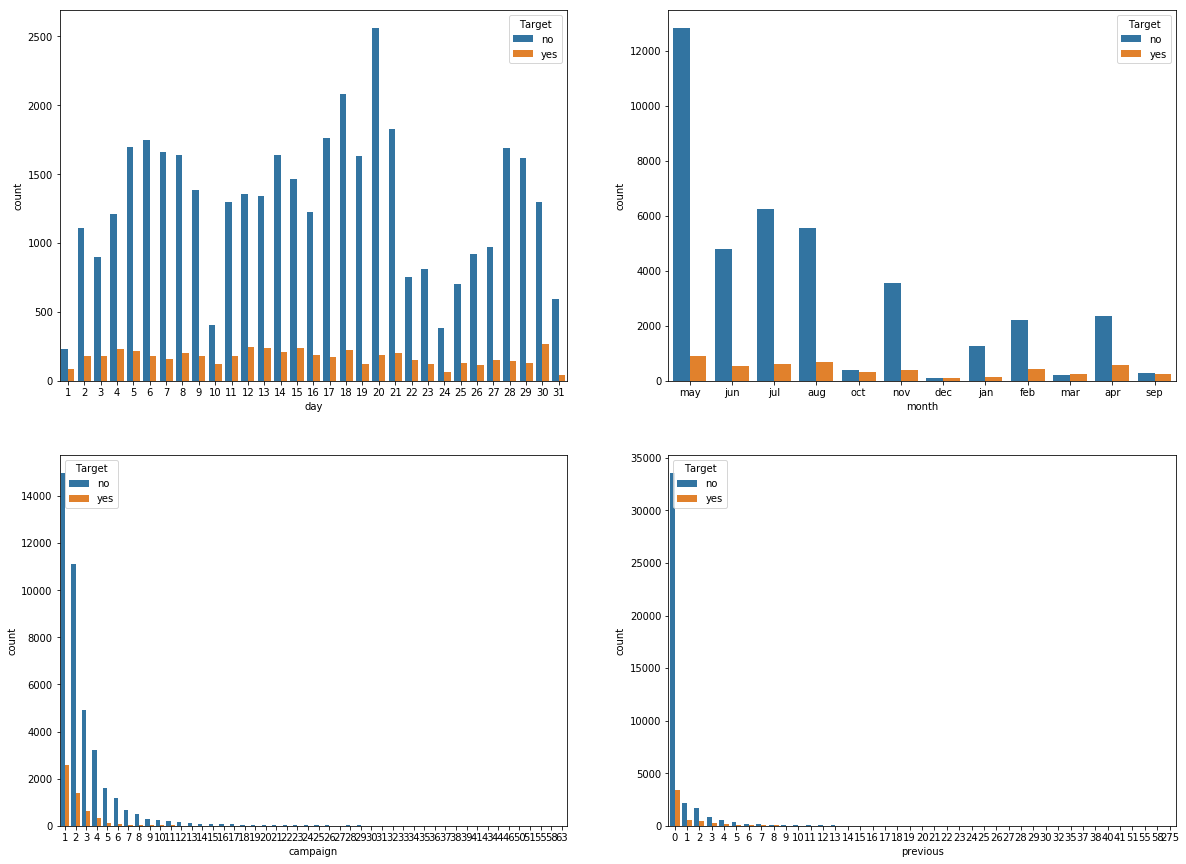

In [70]:
f,axes=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x="day", hue="Target", data=data,ax=axes[0,0])
sns.countplot(x="month", hue="Target", data=data,ax=axes[0,1])
sns.countplot(x="campaign", hue="Target", data=data,ax=axes[1,0])
sns.countplot(x="previous", hue="Target", data=data,ax=axes[1,1])
plt.show()

It is hard to draw any conclusions as looking above plots since the data seems very biased.

The data looks very unbalanced.

In [71]:
#To check for the balance on the Dependent(Target) variable
data["Target"].value_counts()


no     39922
yes     5289
Name: Target, dtype: int64

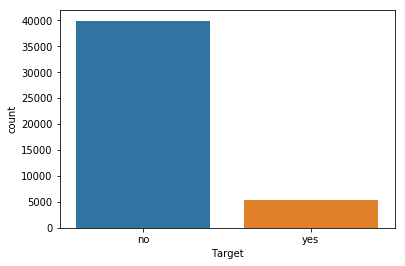

In [72]:
#let us visualize for better understanding and impact 
sns.countplot(x='Target', data=data)


This is a case of Dummy Trap.
Where the dataset leads us particularly to one type of class/category of the Dependent(Target) variable.

In this case this will have an affinity towards "no" category in "target" column.

This should be made equally distributed before training and testing. By doing so automatically, we will be getting rid of outliers.

In [73]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature]).codes # Replace strings with an integer

In [74]:
#As discussed earlier let us drop all the non contacted people, who have not suscribed
#By this way we still have people how have voluantarily suscribed people

dataT=data.drop(data.loc[(data['previous']==0) & (data['Target']==0)].index)

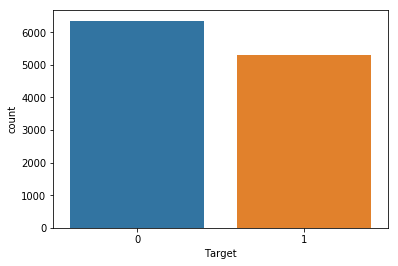

In [75]:
#Now let us visualize the transformed dataset
sns.countplot(x='Target', data=dataT)

This looks much better than the untransformed dataset 

In [76]:
dataT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11641 entries, 83 to 45210
Data columns (total 17 columns):
age          11641 non-null int64
job          11641 non-null int8
marital      11641 non-null int8
education    11641 non-null int8
default      11641 non-null int8
balance      11641 non-null int64
housing      11641 non-null int8
loan         11641 non-null int8
contact      11641 non-null int8
day          11641 non-null int64
month        11641 non-null int8
duration     11641 non-null int64
campaign     11641 non-null int64
pdays        11641 non-null int64
previous     11641 non-null int64
poutcome     11641 non-null int8
Target       11641 non-null int8
dtypes: int64(7), int8(10)
memory usage: 1.1 MB


In [77]:
#to look up in excel
#dataT.to_csv("TRANSFORMED PORTUGUESE BANK MARKETING PROJECT.csv")

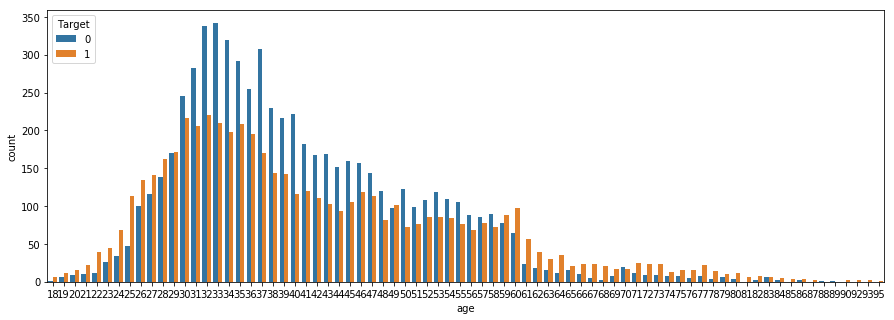

In [78]:
f,axes=plt.subplots(figsize=(15,5))
sns.countplot(x="age", hue="Target", data=dataT)
plt.show()

The age band below 29 and above 58 should be targeted.

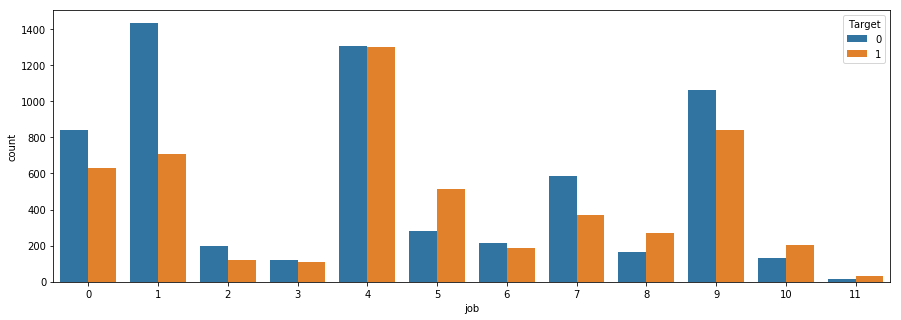

In [79]:
f,axes=plt.subplots(figsize=(15,5))
sns.countplot(x="job", hue="Target", data=dataT)
plt.show()

As from age interpretation,

The students and retaired personnels should be considered as the 1st target.

later comes housemaids, self employed..


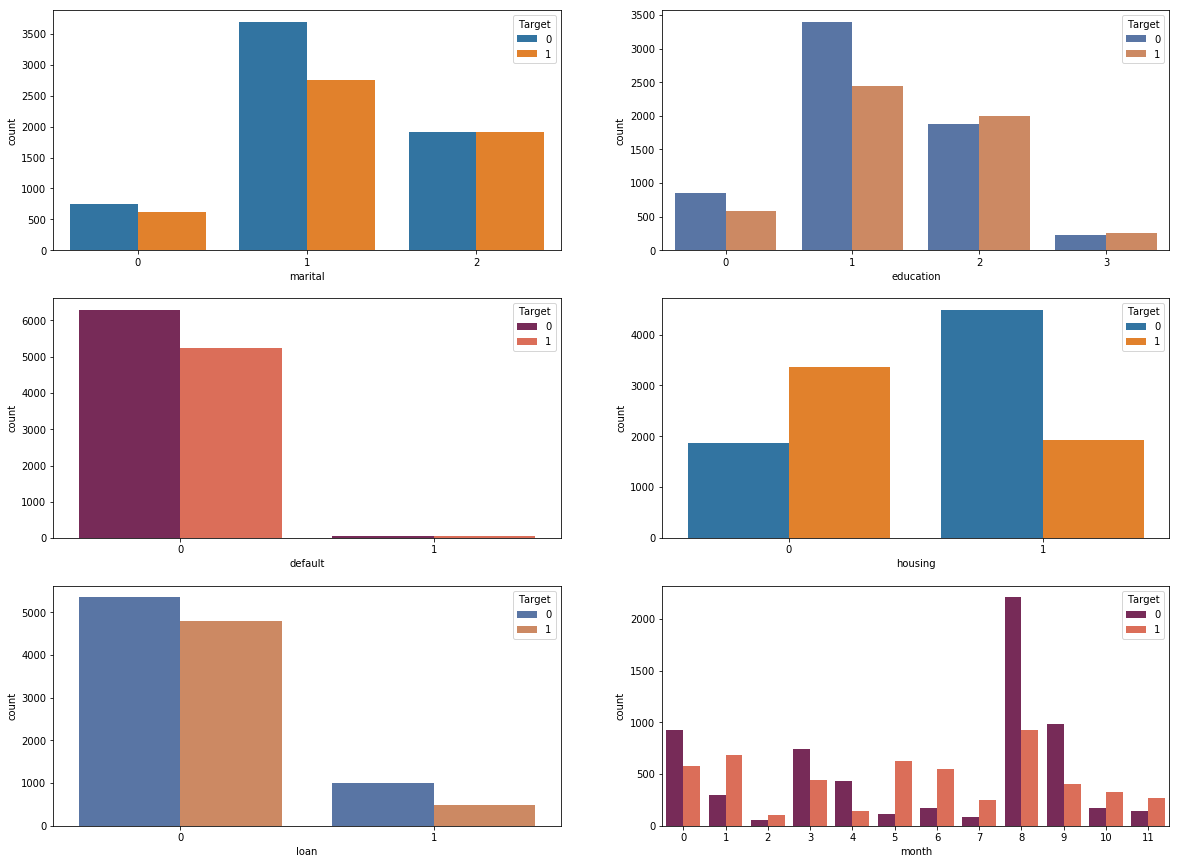

In [80]:
f,axes=plt.subplots(3,2,figsize=(20,15))
sns.countplot(x="marital", hue="Target", data=dataT,ax=axes[0,0],)
sns.countplot(x="education", hue="Target", data=dataT,ax=axes[0,1],palette="deep")
sns.countplot(x="default", hue="Target", data=dataT,ax=axes[1,0],palette="rocket")
sns.countplot(x="housing", hue="Target", data=dataT,ax=axes[1,1])
sns.countplot(x="loan", hue="Target", data=dataT,ax=axes[2,0],palette="deep")
sns.countplot(x="month", hue="Target", data=dataT,ax=axes[2,1],palette="rocket")
plt.show()

Surprisingly people with housing loan have suscribed more.(may be to secure/reinvest granted housing loan).

And also people with no personal loan should be contacted 1st.

Any kind of defaulters should be avoided.

Divoreced and married people show more interest than unmarried.

May, june, july seems to have higher rate of subscription i.e, at the starting of the new financial year.

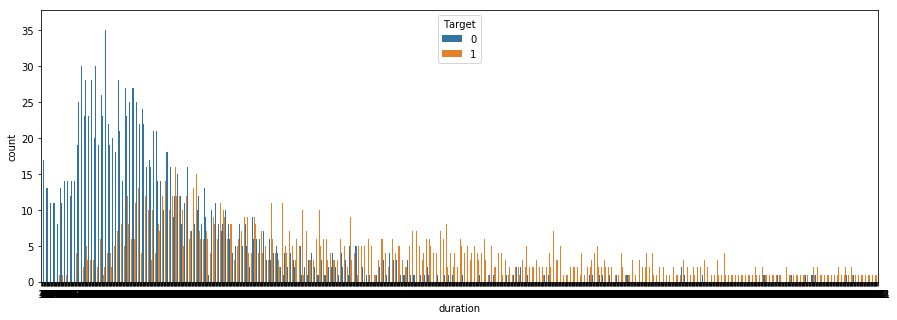

In [81]:
f,axes=plt.subplots(figsize=(15,5))
sns.countplot(x="duration", hue="Target", data=dataT)
plt.show()

we can see that the interested have long conversations and more likely to suscribe.

### 5. Train Data Set

In [82]:
# Arrange data into independent variables and dependent variables
x =  dataT.drop("Target", axis=1)
y =  dataT['Target']

In [83]:
# Split the data into train and test
# Train data size: 70% of data
# Test data size: 30% of data
train_set, test_set, train_labels, test_labels = train_test_split(x, y, test_size=0.3, random_state=10)

### 6.DecisionTree Model 

In [84]:
# invoking the decision tree classifier function.
dt_model = DecisionTreeClassifier(criterion = 'entropy' , random_state = 100)

In [85]:
dt_model.fit(train_set, train_labels )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [86]:
dt_model.score(test_set , test_labels)

0.8471228170626969

In [87]:
dt_model.score(train_set, train_labels)

1.0

### 7.Regularising DicisionTree

In [89]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5, min_samples_leaf=5 )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
print(dt_model.score(train_set , train_labels))

print(dt_model.score(test_set , test_labels))

0.8934707903780069
0.8866304036644718


### 8.Ensemble Learning: Bagging

In [91]:
target_labels = dataT.pop("Target")

In [92]:
bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True)

bgcl = bgcl.fit(dataT, target_labels)
print(bgcl.oob_score_)

0.8922772957649686


### 9.Ensemble Learning: Boosting

In [93]:
#AdaBoosting
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = abcl.fit(train_set, train_labels)

In [94]:
test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)

0.8657314629258517

In [95]:
#GradientBoosting
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(train_set, train_labels)

In [96]:
test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)

0.8917835671342685

### 10.Ensemble RandomForest Classifier 

In [103]:
rfcl = RandomForestClassifier(n_estimators = 15)
rfcl = rfcl.fit(train_set, train_labels)

In [104]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.8854852562267392

## Conclusion

We finally find a score of 88.5% using RandomForest Classifier.

## Scope

I feel the dataset can be divided/grouped into 2 sets and to do a prediction model;

    1.The set relating to information of client,('age','job','marital','education','default','balance','housing','loan')

    2.The set relating to campaign,('duration','contact','month','day','campain','pdays','previous','poutcome')

They make up a separate objective, after identifying the likely people to opt the term deposite in the current dataset, an another predicton regarding how to communicate with them and the predection of them opting for a term deposite after communication done can be done using another model.
